In [1]:
import pandas
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
!tail -n 14 ../data/adult.names | awk -F: '{print "\x22"$1"\x22,"}'

"age",
"workclass",
"fnlwgt",
"education",
"education-num",
"marital-status",
"occupation",
"relationship",
"race",
"sex",
"capital-gain",
"capital-loss",
"hours-per-week",
"native-country",


In [10]:
def read_data(n=None):
    colnames = ["age",
"workclass",
"fnlwgt",
"education",
"education-num",
"marital-status",
"occupation",
"relationship",
"race",
"sex",
"capital-gain",
"capital-loss",
"hours-per-week",
"native-country",
"income"]
    df = pandas.read_csv('../data/adult.data.gz', names=colnames)
    if n:
        df = df.sample(n)
        df.index = range(n)
    target = (df['income'] == " >50K")*1
    df.pop('income')
    return df, target

In [11]:
features, target = read_data(2000)

In [12]:
cat_columns = ['sex', 'education', 'race']
cont_columns = ['age', 'education-num']

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [15]:
cat_trans = Pipeline(steps=[('onehot', OneHotEncoder(drop='first'))])
cont_trans = Pipeline(steps=[('scale', StandardScaler())])

feature_trans = ColumnTransformer(
    transformers=[('categorical', cat_trans, cat_columns),
                 ('continuous', cont_trans, cont_columns)])

classifier = Pipeline(steps=[('feature_tranform', feature_trans),
                             ('classifier', KNeighborsClassifier(n_neighbors=35))])

In [16]:
classifier

Pipeline(steps=[('feature_tranform',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sex', 'education', 'race']),
                                                 ('continuous',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'education-num'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=35))])

In [17]:
from sklearn import set_config
set_config(display='diagram')

In [18]:
classifier

Pipeline(steps=[('feature_tranform',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sex', 'education', 'race']),
                                                 ('continuous',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'education-num'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=35))])

In [19]:
from sklearn.model_selection import cross_val_score

In [27]:
cv_scores = cross_val_score(classifier, features, target, cv=20)

In [32]:
cv_scores

array([0.82, 0.81, 0.83, 0.81, 0.79, 0.79, 0.77, 0.75, 0.83, 0.79, 0.81,
       0.75, 0.77, 0.78, 0.84, 0.78, 0.78, 0.79, 0.8 , 0.74])

In [33]:
cv_scores.mean()

0.7915

(array([3., 2., 7., 4., 4.]),
 array([0.74, 0.76, 0.78, 0.8 , 0.82, 0.84]),
 <BarContainer object of 5 artists>)

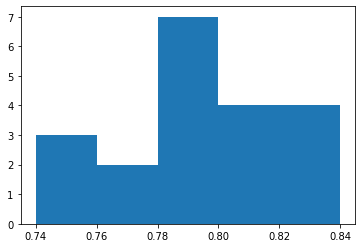

In [34]:
plt.hist(cv_scores, bins=5)

In [29]:
from sklearn.utils import resample

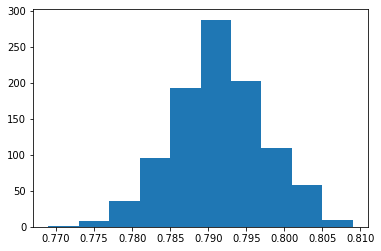

In [35]:
plt.hist([resample(cv_scores).mean() for _ in range(1000)])
None

In [37]:
ks = list(range(10, 100, 10))

In [39]:
score_results = [cross_val_score(Pipeline(steps=[('feature_tranform', feature_trans),
                             ('classifier', KNeighborsClassifier(n_neighbors=k))]), features, target, cv=5)
                for k in ks]

In [40]:
score_results

[array([0.7875, 0.75  , 0.76  , 0.765 , 0.765 ]),
 array([0.805 , 0.7775, 0.79  , 0.7875, 0.7475]),
 array([0.8125, 0.78  , 0.7925, 0.8075, 0.775 ]),
 array([0.8025, 0.79  , 0.7925, 0.7975, 0.765 ]),
 array([0.805 , 0.785 , 0.79  , 0.795 , 0.7575]),
 array([0.81  , 0.7825, 0.795 , 0.7875, 0.75  ]),
 array([0.8075, 0.785 , 0.79  , 0.795 , 0.765 ]),
 array([0.815 , 0.7825, 0.78  , 0.8   , 0.7625]),
 array([0.81  , 0.7875, 0.775 , 0.7975, 0.7675])]

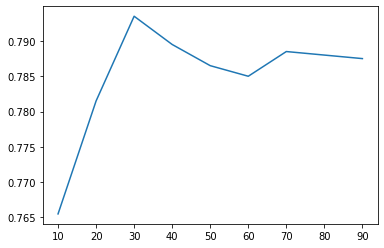

In [41]:
plt.plot(ks, [s.mean() for s in score_results])

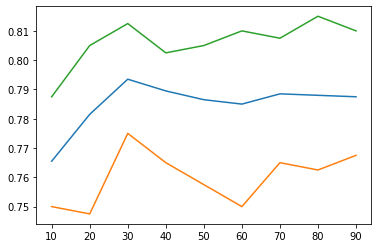

In [42]:
plt.plot(ks, [s.mean() for s in score_results])
plt.plot(ks, [s.min() for s in score_results])
plt.plot(ks, [s.max() for s in score_results])

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = {'classifier__n_neighbors': ks}
grid_search = GridSearchCV(classifier, param_grid, cv=10)

In [45]:
fit_result = grid_search.fit(features, target)

In [47]:
fit_result.best_estimator_.get_params()['steps']

[('feature_tranform',
  ColumnTransformer(transformers=[('categorical',
                                   Pipeline(steps=[('onehot',
                                                    OneHotEncoder(drop='first'))]),
                                   ['sex', 'education', 'race']),
                                  ('continuous',
                                   Pipeline(steps=[('scale', StandardScaler())]),
                                   ['age', 'education-num'])])),
 ('classifier', KNeighborsClassifier(n_neighbors=30))]

<AxesSubplot:xlabel='education'>

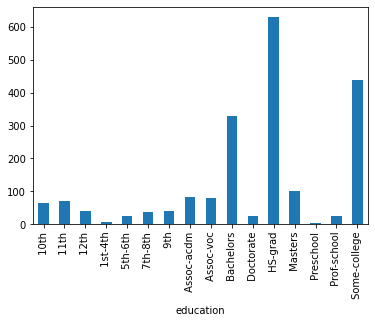

In [105]:
features.groupby('education').size().plot.bar()

In [49]:
dummies = pandas.get_dummies(features)
for column in dummies:
    corr = dummies[column].corr(target)
    print(f"{column}: {corr}")

age: 0.21615987428427208
fnlwgt: -0.008083589196678644
education-num: 0.3343999741748126
capital-gain: 0.21228832120027377
capital-loss: 0.14906965499654196
hours-per-week: 0.23118083095329395
workclass_ ?: -0.07071263258396854
workclass_ Federal-gov: 0.0730272643680172
workclass_ Local-gov: 0.052169750851666884
workclass_ Private: -0.08828847351068034
workclass_ Self-emp-inc: 0.1569096622233166
workclass_ Self-emp-not-inc: -0.0038269124337434756
workclass_ State-gov: 0.011786250654222839
workclass_ Without-pay: -0.012999261958894908
education_ 10th: -0.053359432932670016
education_ 11th: -0.0981620422514636
education_ 12th: -0.06658719151681962
education_ 1st-4th: -0.01859834165401715
education_ 5th-6th: -0.056541669901261415
education_ 7th-8th: -0.07125230426286071
education_ 9th: -0.041925268732812396
education_ Assoc-acdm: 0.001712200023374509
education_ Assoc-voc: 0.010571597206928851
education_ Bachelors: 0.2088087297211597
education_ Doctorate: 0.13650266579037737
education_ HS-

# Forward stepwise feature selection

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
columns = list(features.columns)
selected_features = []
scores = []
N = 10
while len(selected_features) < N:
    best_score = pandas.Series([0])
    best_feature = None
    for feature in columns:
        score = cross_val_score(DecisionTreeClassifier(max_depth=10),
                               pandas.get_dummies(features[selected_features + [feature]]), target)
        if score.mean() > best_score.mean():
            best_feature = feature
            best_score = score
    print(f"{best_feature}: {best_score} ({best_score.mean()})")
    columns.remove(best_feature)
    selected_features.append(best_feature)
    scores.append(score)

capital-gain: [0.8125 0.7975 0.7975 0.795  0.775 ] (0.7954999999999999)
capital-loss: [0.8325 0.835  0.815  0.8225 0.7825] (0.8174999999999999)
marital-status: [0.8275 0.8375 0.82   0.8175 0.7825] (0.817)
education: [0.8725 0.8325 0.8375 0.8825 0.805 ] (0.8459999999999999)
education-num: [0.875  0.8325 0.8375 0.8775 0.8075] (0.8459999999999999)
sex: [0.87   0.8275 0.8325 0.8775 0.805 ] (0.8425)
relationship: [0.8725 0.8275 0.825  0.8725 0.805 ] (0.8405000000000001)
age: [0.875  0.835  0.8275 0.8675 0.805 ] (0.842)
race: [0.865  0.8325 0.82   0.86   0.805 ] (0.8365)
occupation: [0.86   0.825  0.815  0.87   0.7975] (0.8335000000000001)


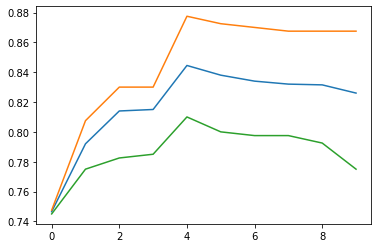

In [61]:
plt.plot([s.mean() for s in scores])
plt.plot([s.max() for s in scores])
plt.plot([s.min() for s in scores])

In [62]:
import numpy

In [81]:
N = 200
random_features = pandas.DataFrame(numpy.random.normal(size=(N, N)))
random_target = numpy.random.choice([0, 1], size=N)

In [65]:
from sklearn.model_selection import train_test_split

In [82]:
Xtr, Xte, ytr, yte = train_test_split(random_features, random_target, test_size=0.2)

In [83]:
columns = list(Xtr.columns)
selected_features = []
scores = []
N = 5
while len(selected_features) < N:
    best_score = pandas.Series([0])
    best_feature = None
    for feature in columns:
        score = cross_val_score(DecisionTreeClassifier(max_depth=10),
                               pandas.get_dummies(Xtr[selected_features + [feature]]), ytr)
        if score.mean() > best_score.mean():
            best_feature = feature
            best_score = score
    print(f"{best_feature}: {best_score} ({best_score.mean()})")
    columns.remove(best_feature)
    selected_features.append(best_feature)
    scores.append(score)

15: [0.75  0.5   0.625 0.625 0.625] (0.625)
197: [0.6875  0.6875  0.71875 0.5625  0.6875 ] (0.66875)
86: [0.75    0.6875  0.65625 0.5625  0.65625] (0.6625)
11: [0.625   0.71875 0.71875 0.65625 0.6875 ] (0.68125)
173: [0.71875 0.75    0.71875 0.6875  0.59375] (0.69375)


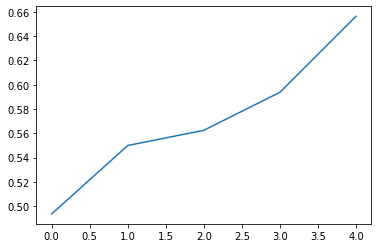

In [84]:
plt.plot([s.mean() for s in scores])

In [85]:
model = DecisionTreeClassifier(max_depth=10).fit(Xtr[selected_features], ytr)

In [73]:
from sklearn.metrics import accuracy_score

In [86]:
accuracy_score(yte, model.predict(Xte[selected_features]))

0.575

In [87]:
cv_scores_r = cross_val_score(DecisionTreeClassifier(max_depth=10), random_features[selected_features], random_target, cv=30)

In [89]:
cv_scores_r

array([0.42857143, 0.57142857, 1.        , 0.42857143, 0.85714286,
       0.57142857, 0.57142857, 0.71428571, 0.42857143, 0.42857143,
       0.71428571, 0.57142857, 0.42857143, 0.57142857, 0.71428571,
       0.57142857, 0.57142857, 0.57142857, 0.71428571, 0.71428571,
       0.33333333, 0.5       , 0.66666667, 0.33333333, 0.66666667,
       0.5       , 0.33333333, 0.5       , 0.5       , 1.        ])

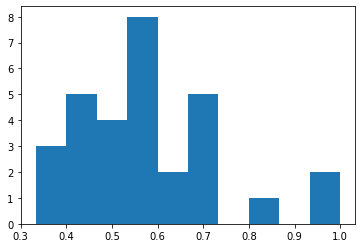

In [91]:
plt.hist(cv_scores_r)
None

In [92]:
import statsmodels.formula.api as smf

In [93]:
features

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,20,Private,131230,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,1590,40,United-States
1,46,Self-emp-not-inc,176319,HS-grad,9,Married-civ-spouse,Sales,Own-child,White,Female,7298,0,40,United-States
2,26,Private,159603,Assoc-acdm,12,Never-married,Adm-clerical,Unmarried,White,Female,0,0,32,United-States
3,38,Private,175232,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,45,United-States
4,20,Private,166527,Some-college,10,Never-married,Adm-clerical,Own-child,Other,Female,0,0,20,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,39,Federal-gov,116608,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
1996,35,Private,126675,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,46,?
1997,35,Private,360799,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,40,United-States
1998,29,Private,49087,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States


In [94]:
X = features.copy()

In [95]:
X['target'] = target

In [96]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,20,Private,131230,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,1590,40,United-States,0
1,46,Self-emp-not-inc,176319,HS-grad,9,Married-civ-spouse,Sales,Own-child,White,Female,7298,0,40,United-States,1
2,26,Private,159603,Assoc-acdm,12,Never-married,Adm-clerical,Unmarried,White,Female,0,0,32,United-States,0
3,38,Private,175232,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,45,United-States,0
4,20,Private,166527,Some-college,10,Never-married,Adm-clerical,Own-child,Other,Female,0,0,20,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,39,Federal-gov,116608,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
1996,35,Private,126675,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,46,?,0
1997,35,Private,360799,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,40,United-States,1
1998,29,Private,49087,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,0


In [97]:
sm_fit = smf.logit("target ~ age + Q('education-num') + sex + race", data=X).fit()

Optimization terminated successfully.
         Current function value: 0.450892
         Iterations 7


In [98]:
sm_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
===========================================================================
Model:                  Logit               Pseudo R-squared:    0.202     
Dependent Variable:     target              AIC:                 1819.5670 
Date:                   2020-09-03 11:46    BIC:                 1864.3742 
No. Observations:       2000                Log-Likelihood:      -901.78   
Df Model:               7                   LL-Null:             -1130.1   
Df Residuals:           1992                LLR p-value:         1.6218e-94
Converged:              1.0000              Scale:               1.0000    
No. Iterations:         7.0000                                             
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Intercept                   -6.9333   0.7543 -9.1919 0.0000 -8.4117 -5.4550
sex[T. Male]                 1.4385   0.1503  9.5733 0.0000  1.1440  1.7330
race[T. Asian-Pac-Islander] -1.2222   0.7737 -1.5797 0.1142 -2.7385  0.2942
race[T. Black]              -0.8609   0.6930 -1.2424 0.2141 -2.2191  0.4973
race[T. Other]              -1.6724   1.1265 -1.4846 0.1376 -3.8803  0.5355
race[T. White]              -0.7710   0.6669 -1.1561 0.2476 -2.0780  0.5361
age                          0.0410   0.0046  8.9855 0.0000  0.0320  0.0499
Q('education-num')           0.3689   0.0261 14.1469 0.0000  0.3178  0.4200
===========================================================================

"""